## CAR PRICE PREDICTION

In [46]:
# Standard imports
import os
# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOADING DATASETS

In [47]:
# Loading the data set-1
Car_price_dataset=pd.read_csv("/content/CarPrice_Assignment.csv")

# Loading the data set-2
Data_dict_xl=pd.read_excel("/content/Data Dictionary - carprices.xlsx")


In [48]:
# Just checking my dataset-1:

# First few rows of dataset
Car_price_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [49]:
# Last few rows of dataset
Car_price_dataset.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [50]:
# Size of my dataset-1
print("My Dimenstion is:",Car_price_dataset.shape)

My Dimenstion is: (205, 26)


In [51]:
# Dataset-1 info
Car_price_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [52]:
# Dataset-1 description
Car_price_dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [53]:
Car_price_dataset.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
58,59,3,mazda glc 4,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.33,3.255,9.4,135,6000,16,23,15645.0
28,29,-1,dodge dart custom,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.34,3.460,8.5,88,5000,24,30,8921.0
37,38,0,honda accord,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.580,9.0,86,5800,27,33,7895.0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.900,9.5,207,5900,17,25,34028.0
60,61,0,mazda glc custom l,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.390,8.6,84,4800,26,32,8495.0


In [ ]:
# Checking for null values
Car_price_dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [54]:
print(" NULL VALUES NOT PRESENT")

 NULL VALUES NOT PRESENT


In [55]:
new_data= Car_price_dataset.drop(['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','cylindernumber','enginetype','fuelsystem'], axis=1)


BUILDING MY MODEL USING LINEAR REGRESSION

In [56]:
# Model Training: step 1--> Splitting the features and target
data=Car_price_dataset.values
X= new_data.drop(['car_ID','price'],axis=1)
Y= new_data['price']

In [58]:
print(X)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68            

In [59]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


In [60]:
# Model Training: step 2--> splitting dataset into train and test datset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [61]:
# Model Training: step 3--> Training model using Linear Regression
from sklearn.linear_model import LinearRegression
Linear_reg_model=LinearRegression()
Linear_reg_model.fit(X_train,y_train)

LinearRegression()

FINAL PREDICTION

In [68]:
# Prection Model

Training_data_prediction=Linear_reg_model.predict(X_train)

In [65]:
from sklearn import metrics
error_score=metrics.r2_score(y_train,Training_data_prediction )
print('ERROR SCORE:',error_score)

ERROR SCORE: 0.8730868702239465


SAMPLE VISUALIZATION

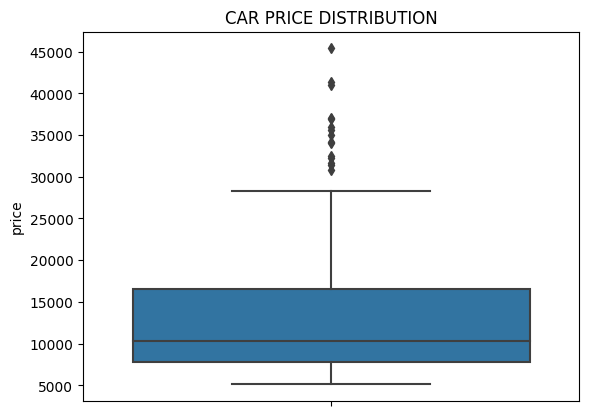

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


In [69]:
# DEPENDENT VARIABLE DISTRIBUTION

plt.title('CAR PRICE DISTRIBUTION')
sns.boxplot(y=Car_price_dataset.price)
plt.show()
print(Car_price_dataset.price.describe())

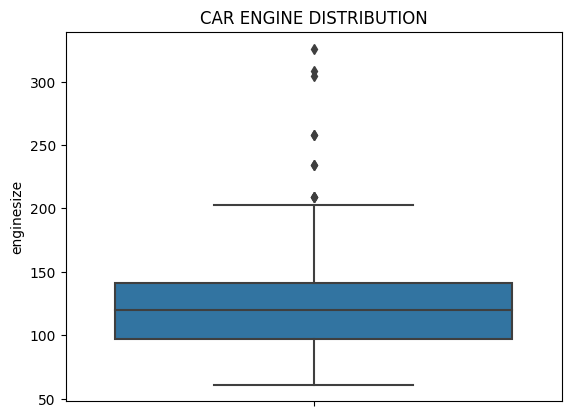

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64


In [75]:
# INDEPENDENT VARIABLE DISTRIBUTION
plt.title('CAR ENGINE DISTRIBUTION')
sns.boxplot(y=Car_price_dataset.enginesize)
plt.show()
print(Car_price_dataset.enginesize.describe())